# NDVI Calculation

You will work with high-quality satellite imagery from Sentinel to display both the **Red (R)** and **Near-InfraRed (NIR)** bands for a specific area (rather a very small one, such as $100\text{ m}^2$).

Please complete the first section (**Setup**) before the workshop starts.

## Setup

1. Ensure your project directory is properly organized.

        project-directory/
        │
        ├── images/
        │
        ├── raw/
        │   ├── ndvi/
        │   ├── ndwi/
        │   ├── time_series_1/
        │   └── time_series_2/
        │
        └── script.py

   We will use the `raw/` folder to store input raster files (Sentinel TIFF images).


2. Ensure that the necessary libraries are installed and configured in your Python environment.

In [1]:
# Install required packages (uncomment to install if needed)
# !pip install rasterio numpy matplotlib
# Import libraries
import rasterio
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import re

# Print versions of the libraries to ensure compatibility
print(f"Rasterio version: {rasterio.__version__}")
print(f"Numpy version: {np.__version__}")

Rasterio version: 1.4.3
Numpy version: 2.3.4


These resources provide comprehensive information on usage, functions, and examples for each library:

- [**rasterio**](https://rasterio.readthedocs.io/): For reading and processing raster data
- [**numpy**](https://numpy.org/doc/): For numerical operations
- [**pathlib**](https://docs.python.org/3/library/pathlib.html): For handling file paths
- [**matplotlib**](https://matplotlib.org/stable/contents.html): For data visualization
- [**re (Regular Expressions)**](https://docs.python.org/3/library/re.html): For handling regular expressions

## Step-by-Step Guide for Geospatial Analysis

### Step 1: Accessing Sentinel Imagery

- **[SentiWiki](https://sentiwiki.copernicus.eu/web/sentiwiki)** will help you choose a satelite for getting the data. 
- Once one is selected, visit the [Copernicus Open Access Hub](https://dataspace.copernicus.eu/) to access Sentinel data.
- Which bands do you need for an NDVI analysis?
- Start downloading single data. Choose an area of Interest (Crop to AOI).

### Step 2: Download Bands

Identify and download the required bands for calculating the **NDVI**. Ensure to:

- You can use coordinates (latitude and longitude) to define the exact location.
- Select the **TIFF** format with **16-bit** depth.
- Choose a **MEDIUM** (682 x 413 px is automatically set) resolution suitable for your analysis.
- You can use `pathlib` library to manipulate files. Load the data and characterize it.
- Discuss what px refers to.

**A Raster File:**

A raster file is an image file that contains data organized in a grid of cells, often representing geographic data. In satellite imagery, each cell (or pixel) in the grid has a specific value that can represent various physical characteristics, such as light reflectance in different bands (e.g., Red, NIR, Blue, Green, etc.).

The `.tiff` files (often GeoTIFF format) commonly used in remote sensing contain such raster data. They typically include metadata that describes the spatial reference, coordinate system, and the specific bands of data (like B4 for Red and B8 for NIR in Sentinel-2 imagery).

**How deep do you want to go?** 

- You can download the data from the GUI or develop a Python API.
- Load and analyze the contet of the data. 
- Examine various attributes of the dataset object to understand its structure and properties: `type(src).__name__`, `src.width`, `src.height`, `src.crs`, `src.count`, `src.meta`.
- Particularly understand `type(src.read()).__name__`. Check the putputs of `src.read().shape` and `src.read(1).shape`.

In [2]:
# Get data from Sentinel-2 L2A
directory_path = Path('../raw/ndvi')
# Gey TIFF files names
for file_path in directory_path.glob("*.tiff"):
    print(file_path)
print('-'*20)

for file_path in directory_path.glob("*B*.tiff"):
    print('Choose a file:')
    print(file_path)
    file_path = file_path
print('*'*20)

# Type the solution here:
# ............................
with rasterio.open(file_path) as src:
    print(f"Exploring {type(src).__name__}: {file_path.name}")
    print(f" - Width: {src.width}")
    print(f" - Height: {src.height}")
    print(f" - CRS (Coordinate Reference System): {src.crs}")
    print(f" - Bounds: {src.bounds}")
    print(f" - Number of Bands: {src.count}")
    print(" - Indexes:", src.indexes)
    print(f" Metadata: {src.meta}", file_path.name)
    print(f" Content ({type(src.read()).__name__}: {src.read().shape}): ", src.read(1).shape)
    print(" Tags: ", src.tags(0))


../raw/ndvi/2024-11-22-00:00_2024-11-22-23:59_Sentinel-2_L2A_B08_(Raw).tiff
../raw/ndvi/2024-11-22-00:00_2024-11-22-23:59_Sentinel-2_L2A_B04_(Raw).tiff
--------------------
Choose a file:
../raw/ndvi/2024-11-22-00:00_2024-11-22-23:59_Sentinel-2_L2A_B08_(Raw).tiff
Choose a file:
../raw/ndvi/2024-11-22-00:00_2024-11-22-23:59_Sentinel-2_L2A_B04_(Raw).tiff
********************
Exploring DatasetReader: 2024-11-22-00:00_2024-11-22-23:59_Sentinel-2_L2A_B04_(Raw).tiff
 - Width: 682
 - Height: 413
 - CRS (Coordinate Reference System): EPSG:4326
 - Bounds: BoundingBox(left=-54.259586334228516, bottom=-34.6733821521891, right=-54.13702011108399, top=-34.61237177558771)
 - Number of Bands: 1
 - Indexes: (1,)
 Metadata: {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 682, 'height': 413, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","89

### Step 3: Explore, Characterize and Visualize the Data

Begin by defining a function that reads a band from a .tiff file and returns both the band data and its metadata. You can use Rasterio again; the Python library designed for reading and writing geospatial raster data. Rasterio provides tools to work with GeoTIFF files efficiently and integrates well with other geospatial libraries like NumPy. Convert the data to ‘float32’, as it will be required for further calculations. Refer to the function’s docstring for guidance.

Try the function.

After implementing this function, complete the subsequent cell to understand the outputs of `.min()`, `.max()` and `.shape`. This will provide insight into the data you’re handling. 

Finally, visualize the bands to gain a comprehensive understanding of the dataset. You can use `.imshow()` combined with a suitable `cmap="RdYlGn"` to display the images side by side. Activate the `axis` and explain. Interpret the bands (see below).

In [3]:
def read_band(filename):
    """
    Reads a the first band of the file from a TIFF file.
    - Parameters:
        file_path (Path or str): Full path to the file.
    - Returns: tuple, (band_data, metadata)
        band_data (numpy.ndarray): NumPy array of the band values, converted to float32.
        metadata (dict): Metadata of the file.
    """

    # Type the solution here:
    #........................

    with rasterio.open(filename) as src:
        band_data = src.read(1).astype('float32')  # Read the first band
        metadata = src.meta  # Get metadata of the file
        return band_data, metadata

In [4]:
# Try the function here:
#.......................

In [5]:
##################################################################
# Try different images to show in the workshop: 
# raw/ndvi, raw/ndvi1, raw/ndvi2, raw/ndvi3, raw/ndvi4 (La Paloma)
# raw/ndvi5, raw/ndvi6 (these ones are from different locations)
##################################################################
directory_path = Path('../raw/ndvi')

for file_path in directory_path.glob("*.tiff"):
    print(file_path.name)

    if "B08" in file_path.name:  # Check if the file corresponds to B08
        B08, _ = read_band(file_path)
        # Complete the code below:
        #.........................
        print(f"- Band shape:", B08.shape)
        print('- B8 max:',B08.max())
        print('- B8 min:',B08.min()) 
        print('')

    elif "B04" in file_path.name:  # Check if the file corresponds to B04
        B04, _ = read_band(file_path)
        # Complete the code below:
        #.........................
        print(f"Band shape:", B04.shape)
        print('- B4 max:', B04.max())
        print('- B4 min:', B04.min())


2024-11-22-00:00_2024-11-22-23:59_Sentinel-2_L2A_B08_(Raw).tiff
- Band shape: (413, 682)
- B8 max: 50174.0
- B8 min: 1271.0

2024-11-22-00:00_2024-11-22-23:59_Sentinel-2_L2A_B04_(Raw).tiff
Band shape: (413, 682)
- B4 max: 43043.0
- B4 min: 1226.0


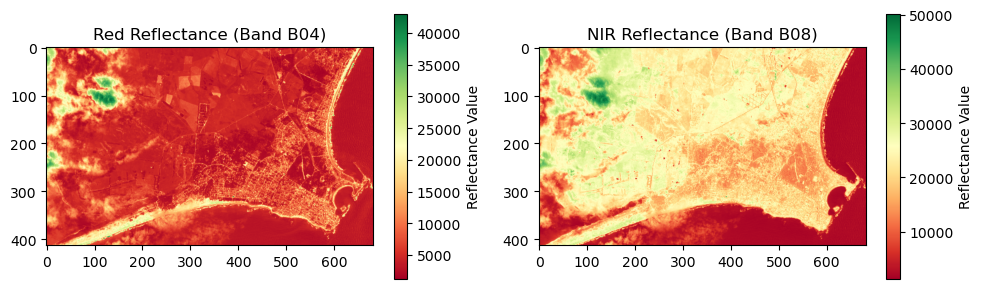

In [6]:
# Visualize both bands side by side
# Type the solution here:
# .......................

plt.figure(figsize=(10, 3))  # Adjust the figure size for better readability

# Visualize Band B08 (NIR)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.title("Red Reflectance (Band B04)")
plt.imshow(B04, cmap="RdYlGn")
plt.colorbar(label="Reflectance Value")

# Visualize Band B04 (Red)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.title("NIR Reflectance (Band B08)")
plt.imshow(B08, cmap="RdYlGn")
plt.colorbar(label="Reflectance Value")

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### What are these Red and NIR bands?

In remote sensing, Red and NIR are two specific regions of the light spectrum captured by sensors on satellites (or drones):

- **Red Band** measures the reflectance in the visible red light spectrum (*600–700* nm in wavelength). Vegetation absorbs most of this red light for photosynthesis (**lower values**), making it a key indicator of plant health. In other words, the amount of red light reflected is inversely related to the amount of chlorophyll in the plants. Bare soil or non-vegetated areas reflect more red light (**higher values**). Check sand and water.

- **Near-InfraRed Band** captures the region of light that is just beyond the visible spectrum (*700–1000* nm). Healthy vegetation reflects a large amount of NIR light, as it is not used in photosynthesis. This high reflectance (**higher values**) in the NIR band is a characteristic of healthy, dense vegetation.

# ![Light Spectrum](../images/Light_Spectrum.png)

Bands are often scaled reflectance values ranging from 0 to a certain maximum.

### Step 4: NDVI calculation

The **Normalized Difference Vegetation Index (NDVI)** is a widely used index in agriculture and land-classification when using remote sensing to analyze vegetation health and land cover. 

NDVI is calculated based on the reflectance of light in the **Red (R)** and **Near-InfraRed (NIR)** bands. Healthy vegetation absorbs most of the visible light (particularly red) and reflects a significant amount of NIR light, while unhealthy or sparse vegetation, and human-made surfaces, reflect more R and less NIR.

#### Formula

**NDVI always ranges from -1 to +1**, and it is calculated with the the NIR and Red channels as follows:

$$\text{NDVI} = \frac{(\text{NIR} - \text{RED})}{(\text{NIR} + \text{RED})}\qquad\qquad(1)$$

where:
- **NIR** is the reflectance in the near-infrared band,
- **RED** is the reflectance in the red band.

The result is a value between -1 and 1:
- **Values closer to 1** indicate dense, healthy vegetation.
- **Values closer to -1** suggest non-vegetative surfaces, such as water, urban areas, or bare soil.
- **Values around 0** indicate sparse vegetation or soil.

#### Applications
NDVI is used to:
1. **Monitor Vegetation Health**: Detecting stressed or unhealthy vegetation.
2. **Track Seasonal Changes**: Identifying trends in vegetation over time.
3. **Assess Land Use**: Evaluating changes in vegetation cover for land management.

#### Calculate the NDVI with the previous bands analyzed

- **Check for Division by Zero:** Ensure that  $\text{NIR} + \text{RED} \neq 0$  to prevent division by zero errors.
- **Compute the NDVI:** Calculate the NDVI using the formula (1). What is the expected size of the NDVI array?
- **Print NDVI Characteristics:** After computing the NDVI, print its shape, minimum, and maximum values to understand the data range and dimensions.
- **Visualize NDVI:** Create a visual representation of the NDVI array to interpret vegetation health.
- **Try with and without** `vmin=-1, vmax=1` to fix the scale of the cmap. What's the difference?

In [7]:
# Check if any values of nir + red are 0
sum_nir_red = B08 + B04  # Perform the addition
# Complete the code below:
#.........................
zeros_exist = np.any(sum_nir_red == 0)  # Check if any value is 0
print(zeros_exist)

False


NDVI shape =  (413, 682)
NDVI maximum =  0.91174155
NDVI minimum =  -0.43173432


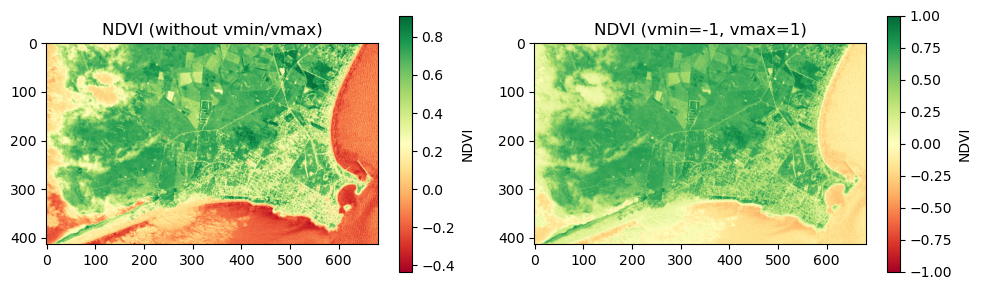

In [8]:
# Calculate & Plot NDVI
# Type the solution here:
# .......................
ndvi = (B08 - B04) / (B08 + B04 + 1e-10)  # Adding a small number to avoid division by zero

print('NDVI shape = ', ndvi.shape)
print('NDVI maximum = ', ndvi.max())
print('NDVI minimum = ', ndvi.min())

# NDVI Plot
plt.figure(figsize=(10, 3))
# --- Left: without vmin ni vmax ---
plt.subplot(1, 2, 1)
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('NDVI (without vmin/vmax)')

# --- Right: with vmin=-1 y vmax=1 ---
plt.subplot(1, 2, 2)
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='NDVI')
plt.title('NDVI (vmin=-1, vmax=1)')

plt.tight_layout()
plt.show()

### Step 5: Additional Indices

Beyond NDVI, various other indices can be derived from processed satellite data to analyze different environmental parameters. One such index is the **Normalized Difference Water Index (NDWI)**, which is particularly useful for monitoring water bodies.

The NDWI is designed to enhance the presence of water features while suppressing the influence of vegetation and soil. It is calculated using the **Green (B03)** and **Near-Infrared (NIR, B08)** bands with the following formula:

$$\text{NDWI} = \frac{\text{Green} - \text{NIR}}{\text{Green} + \text{NIR}} \qquad\qquad(2)$$

In this formula, water has low reflectance in NIR (B08) but higher reflectance in Green (B03 - 559 nm).

Values of NDWI range from -1 to 1: positive values typically indicate the presence of water bodies; negative values correspond to soil, or built-up areas.

- Get two images from a water reservoir (I will show the Pantà de la Llosa del Cavall in Sant Llorenç de Morunys, Spain).

- Choose images where the water level difference between them is expected to be significant (winter/summer).

- Complete the function `store_images` to manipulate data into a dictionary (`dict`).

- Visualize the NDWI for both images, side by side, and analyze the differences between the two dates. `'coolwarm'` can be a suitable `cmap`.

In [9]:
def store_images(file_path, images):
    """
    Reads and stores image data and metadata into a dictionary.

    Parameters:
        file_path (Path): Full path to the image file.
        images (dict): Dictionary to store image data.

    Returns:
        None: Updates the 'images' dictionary in place.
    """

    images[file_path] = {
            "data": read_band(file_path)[0],  # Assuming single band; adjust as needed
            # "metadata": read_band(file_path)[1] # Uncomment if metadata is needed
            "date": re.search(r"\d{4}-\d{2}-\d{2}", file_path.name).group()
        }
    
    print(f"Loaded: {file_path.name}, with date: {images[file_path]['date']}")

In [10]:
# Path to the directory containing the images
directory_path = Path('../raw/ndwi')

# Dictionary to store loaded images
images = {}

# Iterate over the files in the directory
for file_path in directory_path.glob("*.tiff"):
    # Complete the code below:
    #.........................
    store_images(file_path, images)

# Check contents of the dictionary
for label, content in images.items():
    print(f"\nImage Name: {label.stem}")
    print(f"Data Shape: {content['data'].shape}")
    print(f"Scope: [Min = {content['data'].min()}, Max = {content['data'].max()}]")

Loaded: 2017-04-06-00_00_2017-04-06-23_59_Sentinel-2_L2A_NDWI.tiff, with date: 2017-04-06
Loaded: 2024-08-04-00_00_2024-08-04-23_59_Sentinel-2_L2A_NDWI.tiff, with date: 2024-08-04

Image Name: 2017-04-06-00_00_2017-04-06-23_59_Sentinel-2_L2A_NDWI
Data Shape: (446, 702)
Scope: [Min = 0.0, Max = 65535.0]

Image Name: 2024-08-04-00_00_2024-08-04-23_59_Sentinel-2_L2A_NDWI
Data Shape: (446, 702)
Scope: [Min = 0.0, Max = 65535.0]


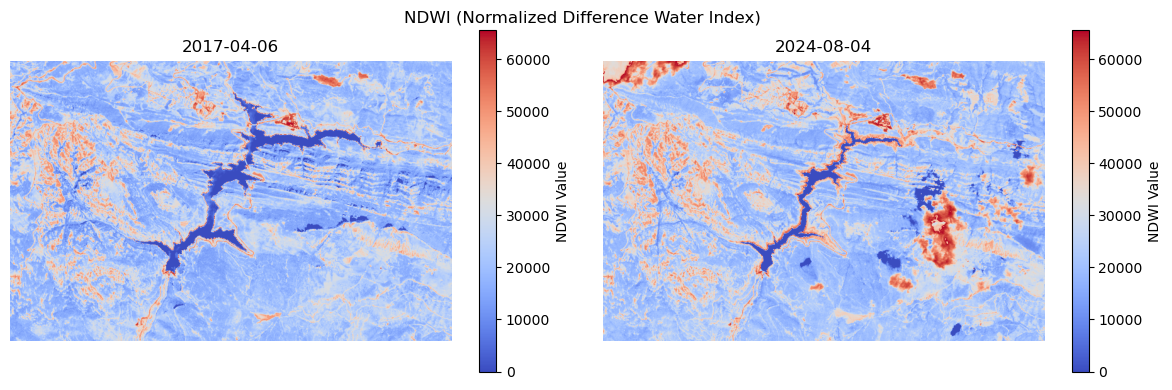

In [11]:
plt.figure(figsize=(12, 4))
plt.title('NDWI (Normalized Difference Water Index)')
plt.axis('off')

for i, (label, content) in enumerate(images.items(), start=1):
    plt.subplot(1, 2, i)
    plt.title(content['date'])
    plt.imshow(content['data'], cmap='coolwarm')
    plt.colorbar(label='NDWI Value')
    plt.axis('off')
plt.tight_layout()
plt.show()

### Step 6: Operations Over Images

#### Thresholding NDWI to Isolate Water Bodies

- Analyze the computed NDWI values to understand their range.
- Play with the code below and understand how masks works. If you have an array such as: `[0.15, 0.05, 0.30, 0.20]`, you will obtain `[F, F, T, T]`, if a `threshold = 0.15` is chosen.
- Implement a function that apply a threshold to classify pixels as water or non-water (binary water mask).           
- Visualize the results (4 plots).
- Key Questions:

    - What happens when you lower or raise the threshold value?
    - Are there any misclassifications (e.g., areas incorrectly identified as water)?

In [12]:
ndvi_real = np.array([0.15, 0.05, 0.30, 0.20])
mask = ndvi_real > 0.15
print(mask)

[False False  True  True]


In [13]:
def apply_mask(data, threshold=1000):
    """
    Applies a mask to the data based on a threshold.

    Parameters:
        data (numpy.ndarray): The NDWI data to mask.
        threshold (float): The value above which pixels are considered water.

    Returns:
        numpy.ndarray: Binary mask with True for values above the threshold.
    """
    masked_data = data > threshold
    return masked_data

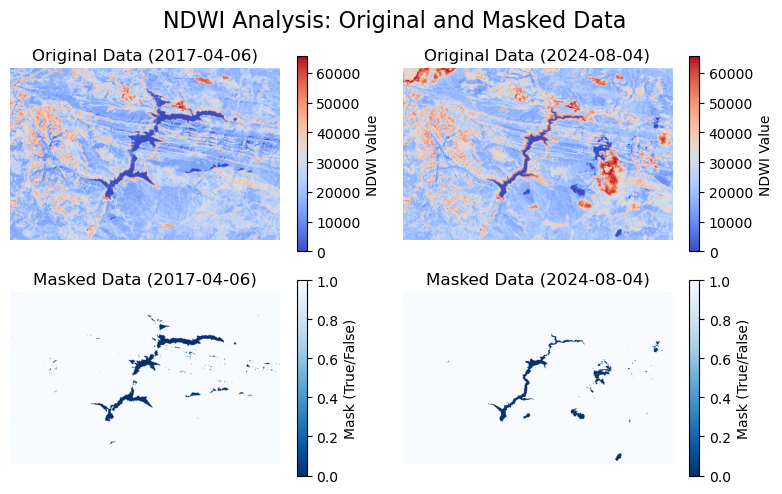

In [14]:
# Create a 2x2 grid for visualization
plt.figure(figsize=(8, 5))
plt.suptitle('NDWI Analysis: Original and Masked Data', fontsize=16)

for i, (label, content) in enumerate(images.items(), start=1):
    # Plot the original data
    plt.subplot(2, 2, i)
    plt.title(f"Original Data ({content['date']})")
    plt.imshow(content['data'], cmap='coolwarm')
    plt.colorbar(label='NDWI Value')
    plt.axis('off')

    # Plot the masked data
    plt.subplot(2, 2, i + 2)  # Second row for the masked data
    threshold = content['data'].max()*0.02
    masked_data = apply_mask(content['data'], threshold)
    plt.title(f"Masked Data ({content['date']})")
    plt.imshow(masked_data, cmap='Blues_r')  # Binary mask
    plt.colorbar(label='Mask (True/False)')
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Image Subtraction for Change Detection

In remote sensing, comparing images from different time periods can help us monitor changes in environmental features, such as water levels in reservoirs. By subtracting one image from another, we can highlight changes over time and quantify the extent of these changes. Subtract the earlier NDWI image from the later NDWI image:


$$\text{Change} = \text{NDWI}{(\text{later})} - \text{NDWI}{(\text{earlier})}$$

Positive values indicate an increase in water levels, while negative values highlight a decrease in water levels.

The resulting image shows areas where water levels have changed, helping us understand the extent of drying or flooding in a reservoir.

**Can You Subtract Two Masked Images? What Would You Expect to See?**

2017-04-06
2024-08-04


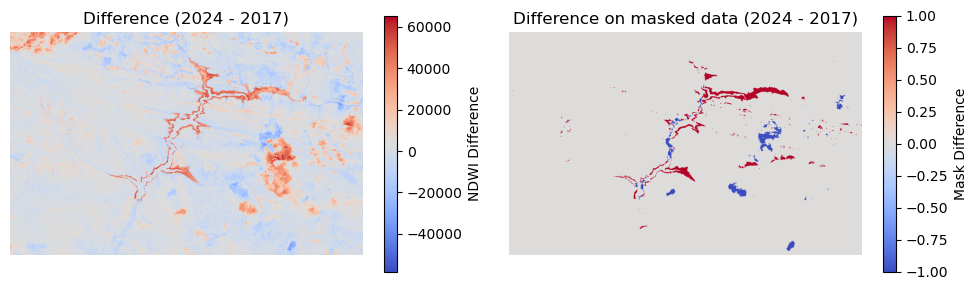

In [15]:
keys = list(images.keys())

print(images[keys[0]]["date"])
print(images[keys[1]]["date"])

diff = images[keys[1]]["data"] - images[keys[0]]["data"]
diff_masked = apply_mask(images[keys[1]]["data"]).astype(int) - apply_mask(images[keys[0]]["data"]).astype(int)

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title("Difference (2024 - 2017)")
plt.imshow(diff, cmap='coolwarm')
plt.colorbar(label='NDWI Difference')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Difference on masked data (2024 - 2017)")
plt.imshow(diff_masked, cmap='coolwarm')
plt.colorbar(label='Mask Difference')
plt.axis('off')
plt.tight_layout()
plt.show()

### Step 7: NDVI Analysis for Multiple Files (time series)

1. Start with a single image and track vegetation over time:
    - Open and visualize the **NDVI** for one file.
    - Adjust the NDVI values to the interval [-1, 1], mapping the available values appropriately.
    - Show both the raw and normalized NDVI images side by side for comparison.
    - Calculate vegetation metrics for each image:
        - **Mean NDVI:** Represents the average vegetation level for the area.
        - **Median NDVI:** Provides a robust measure, less sensitive to extreme values.
        - **High Vegetation Percentage:** Percentage of pixels with NDVI above a threshold (e.g., NDVI > 0.6).

2. Visualize NDVI Over Multiple Years:
    - Represent 9 images from 2016 to 2024 in a 3x3 grid. Use consistent colormap scaling (-1 to 1) for easy comparison.
    - Compute the different metrics for each image.
    - Compile the metrics for all years into a dataset.
    - Create a line graph to show trends across the time series:
	    - X-axis: Years (2016–2024).
	    - Y-axis: NDVI metrics (Mean, Median, and High Vegetation Percentage).
    - Analyze temporal trends in vegetation health.

3. Key Questions:
    - How has vegetation evolved from 2016 to 2024?
    - Are there clear trends (e.g., recovery, degradation, or seasonality)?
    - What do the metrics reveal about the overall health of the area?

In [16]:
# Mask to copmute only pixel above the threshold:
# Understand this technique:
ndvi_real = np.array([[0.15, 0.05, 0.30, 0.20],
                      [0.10, 0.35, 0.20, 0.20]])
print('Array:\n', ndvi_real)
mask = ndvi_real > 0.15
print('Mask:\n', mask)
filtered_values = ndvi_real[mask]
print('Filtered values:', filtered_values)
print('Filtered values sum:', filtered_values.sum())
print('Filtered values mean:', filtered_values.mean())

Array:
 [[0.15 0.05 0.3  0.2 ]
 [0.1  0.35 0.2  0.2 ]]
Mask:
 [[False False  True  True]
 [False  True  True  True]]
Filtered values: [0.3  0.2  0.35 0.2  0.2 ]
Filtered values sum: 1.25
Filtered values mean: 0.25


In [17]:
# Function to normalize NDVI
def normalize_ndvi(ndvi_raw):
    return -(ndvi_raw - ndvi_raw.max() / 2) / (ndvi_raw.max() / 2)

# Function to calculate NDVI metrics
def calculate_metrics(ndvi_normalized, thresholds=[0.5, 0.6, 0.7]):
    mean_ndvi = ndvi_normalized.mean()
    median_ndvi = np.median(ndvi_normalized)
    high_veg_percentages = [
        (ndvi_normalized > threshold).sum() / ndvi_normalized.size * 100
        for threshold in thresholds
    ]
    return mean_ndvi, median_ndvi, high_veg_percentages

Image Shape: 2024-08-09-00_00_2024-08-09-23_59_Sentinel-2_L2A_NDVI.tiff
Data Shape: (186, 264)
Scope: Min = 0.0, Max = 65535.0

Normalized Data Shape: (186, 264)
Scope: Min = -1.0, Max = 1.0
Mean NDVI: -0.2041
Median NDVI: -0.3800
High Vegetation Percentage (NDVI > 0.4): 18.77%
High Vegetation Percentage (NDVI > 0.6): 15.08%
High Vegetation Percentage (NDVI > 0.7): 11.86%


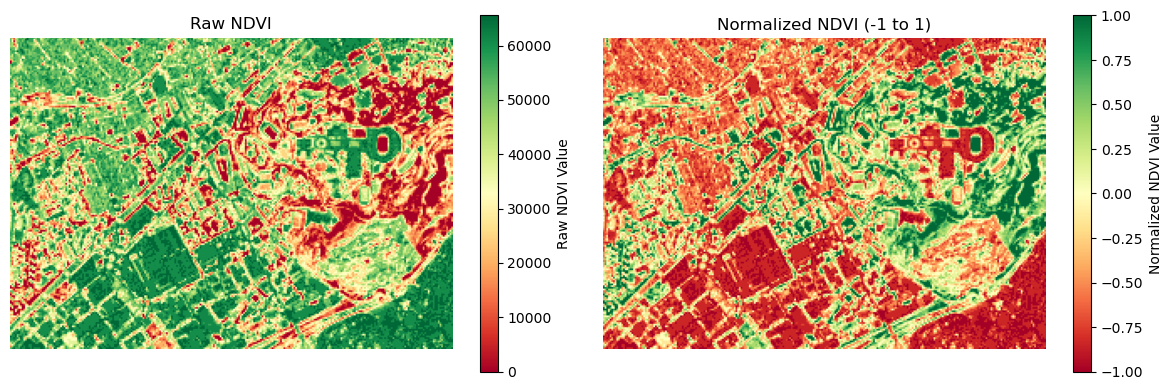

In [19]:
# Root directory
directory_path = Path('../raw/time_series_1')

for i, file_path in enumerate(sorted(directory_path.glob("*2024*.tiff"))):
    ndvi_raw, _ = read_band(file_path)

    print(f"Image Shape: {file_path.name}")
    print(f"Data Shape: {ndvi_raw.shape}")
    print(f"Scope: Min = {ndvi_raw.min()}, Max = {ndvi_raw.max()}\n")

    ndvi_normalized = normalize_ndvi(ndvi_raw)
    print(f"Normalized Data Shape: {ndvi_normalized.shape}")
    print(f"Scope: Min = {ndvi_normalized.min()}, Max = {ndvi_normalized.max()}")

    # Calculate metrics for this image
    thresholds=[0.4, 0.6, 0.7]
    mean_ndvi, median_ndvi, high_veg = calculate_metrics(ndvi_normalized, thresholds)

    # Print metrics
    print(f"Mean NDVI: {mean_ndvi:.4f}")
    print(f"Median NDVI: {median_ndvi:.4f}")
    print(f"High Vegetation Percentage (NDVI > {thresholds[0]}): {high_veg[0]:.2f}%")
    print(f"High Vegetation Percentage (NDVI > {thresholds[1]}): {high_veg[1]:.2f}%")
    print(f"High Vegetation Percentage (NDVI > {thresholds[2]}): {high_veg[2]:.2f}%")

    # Plot both images side by side
    plt.figure(figsize=(12, 4))

    # Plot raw NDVI
    plt.subplot(1, 2, 1)
    plt.title("Raw NDVI")
    plt.imshow(ndvi_raw, cmap='RdYlGn')
    plt.colorbar(label='Raw NDVI Value')
    plt.axis('off')

    # Plot normalized NDVI
    plt.subplot(1, 2, 2)
    plt.title("Normalized NDVI (-1 to 1)")
    plt.imshow(ndvi_normalized, cmap='RdYlGn')
    plt.colorbar(label='Normalized NDVI Value')
    plt.axis('off')

    # Display the plots
    plt.tight_layout()
    plt.show()

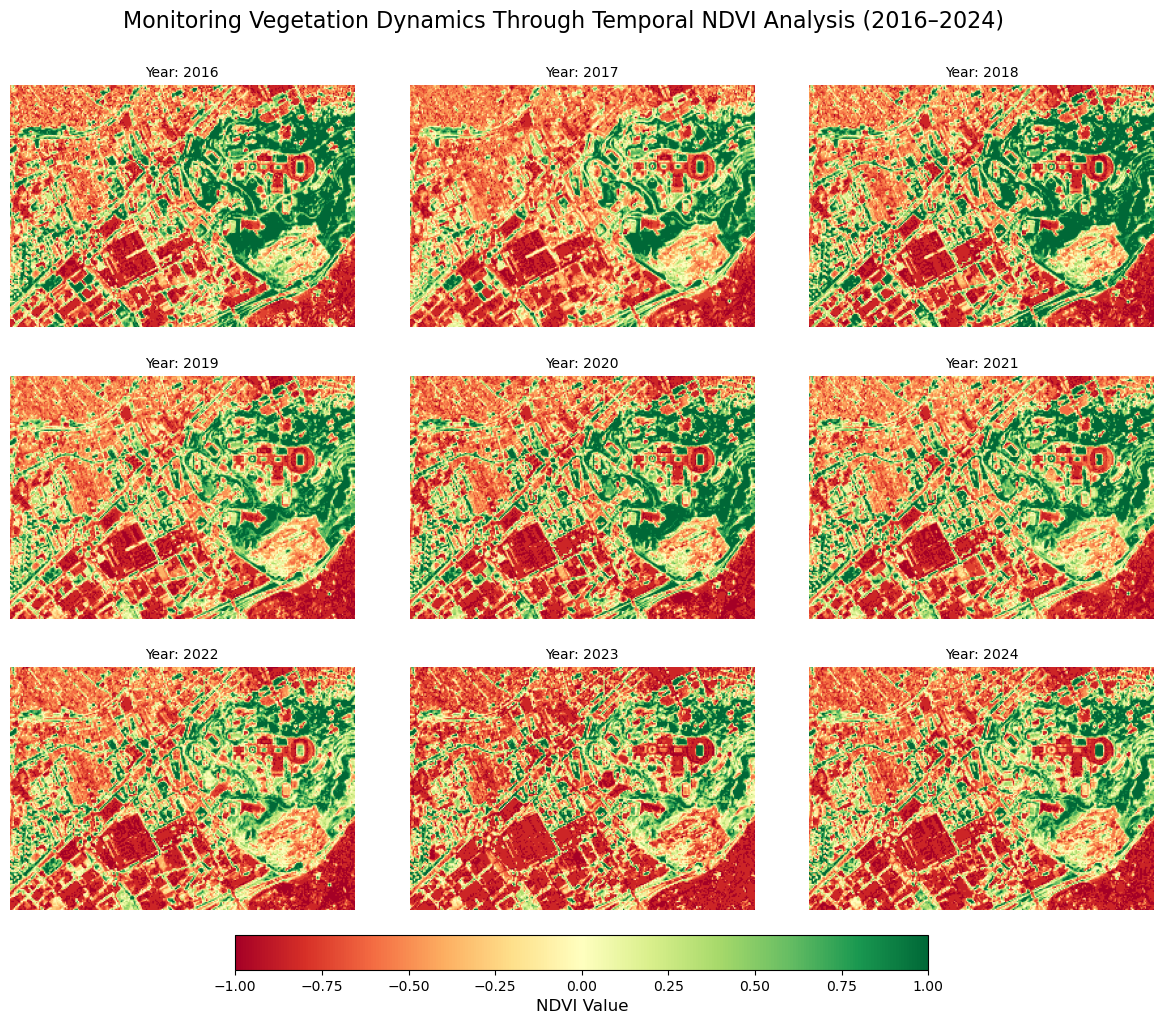

In [20]:
# Variables to store NDVI mean values
ndvi_means = []
ndvi_means_vegetation = {threshold: [] for threshold in [0.1, 0.3, 0.6]}  # NDVI vegetation means by threshold
years = []

# Configure the 3x3 grid for plotting NDVI images
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Process all .tiff files in the directory
for i, file_path in enumerate(sorted(directory_path.glob("*.tiff"))):
    # Extract the year from the filename
    year = int(re.search(r"(\d{4})", file_path.name).group(1))
    years.append(year)
    
    # Open NDVI file
    band, _ = read_band(file_path)
    # Descale NDVI
    ndvi_real = (32768 - band) / 32768
    ndvi_real = normalize_ndvi(band)
    # Calculate overall NDVI mean
    ndvi_means.append(ndvi_real.mean())
    # Calculate NDVI means for vegetation thresholds
    for threshold in ndvi_means_vegetation.keys():
        mask = ndvi_real > threshold
        ndvi_means_vegetation[threshold].append(ndvi_real[mask].mean())

    # Plot each NDVI image in the 3x3 grid
    ax = axes[i]
    im = ax.imshow(ndvi_real, cmap='RdYlGn', vmin=-1, vmax=1)
    ax.set_title(f"Year: {year}", fontsize=10)
    ax.axis('off')

# Add color bar below the grid
cbar = fig.colorbar(im, ax=axes, orientation='horizontal', fraction=0.03, pad=0.07)  # Reduce padding
cbar.set_label('NDVI Value', fontsize=12)

# Adjust layout
plt.suptitle('Monitoring Vegetation Dynamics Through Temporal NDVI Analysis (2016–2024)', fontsize=16, y=0.75)
plt.subplots_adjust(top=0.7, bottom=0.15, wspace=0.1, hspace=0.2)
plt.show()

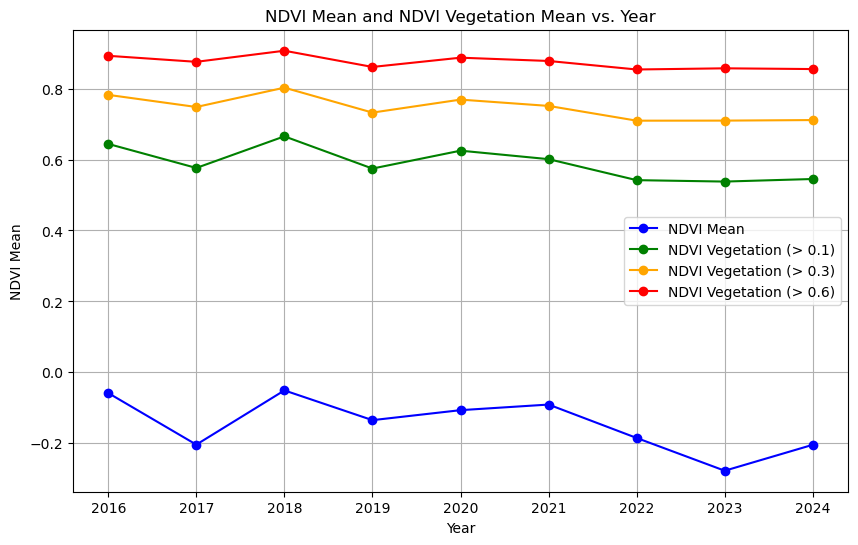

In [21]:
# Plot NDVIs averages vs. year
plt.figure(figsize=(10, 6))
plt.plot(years, ndvi_means, marker='o', label='NDVI Mean', color='blue')  # NDVI Promedio

# Add NDVI means for each threshold to the plot
colors = ['green', 'orange', 'red']  # Colors for each threshold
for threshold, color in zip(ndvi_means_vegetation.keys(), colors):
    plt.plot(years, ndvi_means_vegetation[threshold], marker='o', label=f'NDVI Vegetation (> {threshold})', color=color)

plt.xlabel('Year')
plt.ylabel('NDVI Mean')
plt.title('NDVI Mean and NDVI Vegetation Mean vs. Year')
plt.legend()
plt.grid()
plt.show()

### Extra:

Equivalent analysis for the Delta del Paraná, Buenos Aires, Argentina between 2016 and 2024.

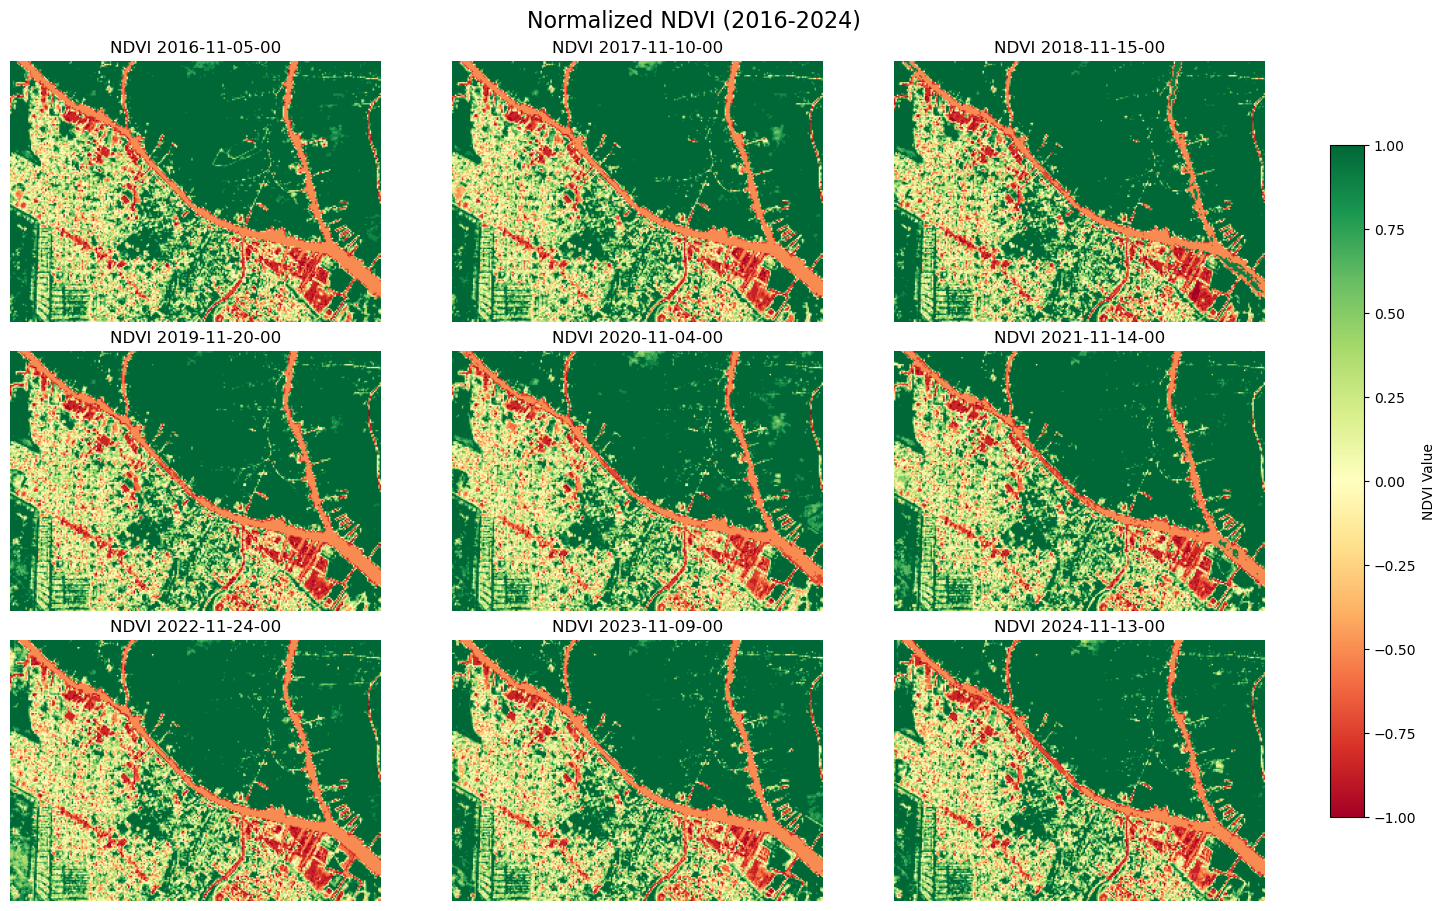

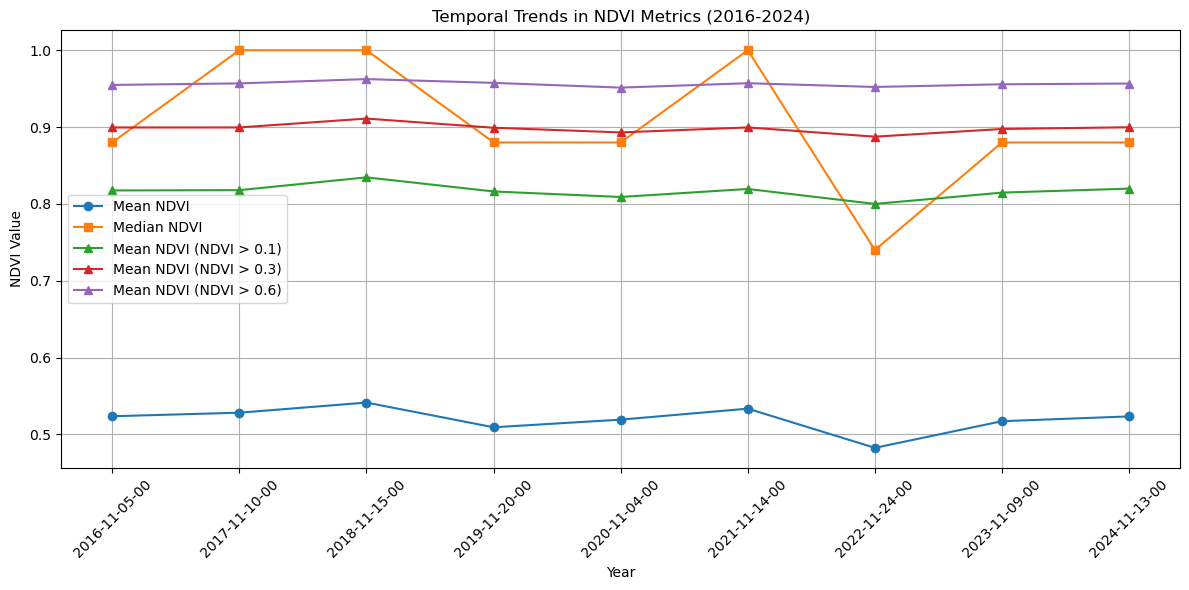

In [53]:
# Function to calculate NDVI metrics with thresholds
def calculate_threshold_metrics(ndvi_normalized, thresholds=[0.1, 0.3, 0.6]):
    """
    Calculate mean NDVI for pixels above each threshold.

    Parameters:
        ndvi_normalized (numpy.ndarray): Normalized NDVI array.
        thresholds (list): List of thresholds for NDVI ranges.

    Returns:
        list: Mean NDVI values for each threshold.
    """
    threshold_means = [
        ndvi_normalized[ndvi_normalized > threshold].mean() if (ndvi_normalized > threshold).any() else 0
        for threshold in thresholds
    ]
    return threshold_means

# Path to directory containing NDVI images
directory_path = Path('../raw/time_series_2')

# Read and process NDVI images
ndvi_data = []
metrics = []
threshold_metrics = []
dates = []

thresholds = [0.1, 0.3, 0.6]

for file_path in sorted(directory_path.glob("*.tiff")):
    ndvi_raw, _ = read_band(file_path)
    ndvi_normalized = normalize_ndvi(ndvi_raw)
    ndvi_data.append(ndvi_normalized)

    # Calculate overall mean and median NDVI
    mean_ndvi = ndvi_normalized.mean()
    median_ndvi = np.median(ndvi_normalized)

    # Calculate mean NDVI for pixels above thresholds
    threshold_means = calculate_threshold_metrics(ndvi_normalized, thresholds)

    metrics.append((mean_ndvi, median_ndvi))
    threshold_metrics.append(threshold_means)

    # Extract date from filename
    date = file_path.stem.split("_")[0]  # Adjust based on filename format
    dates.append(date)

# Convert metrics to NumPy arrays for easier processing
metrics = np.array(metrics)
threshold_metrics = np.array(threshold_metrics).T  # Transpose for thresholds
mean_ndvi_values, median_ndvi_values = metrics.T

# Plot NDVI images in a 3x3 grid with a single color bar
fig, axes = plt.subplots(3, 3, figsize=(15, 9), constrained_layout=True)

# Normalize color bar limits
vmin, vmax = -1, 1  # NDVI range
cmap = 'RdYlGn'

for i, (ax, ndvi_normalized) in enumerate(zip(axes.ravel(), ndvi_data)):
    im = ax.imshow(ndvi_normalized, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_title(f"NDVI {dates[i]}")
    ax.axis('off')

# Add a single color bar for the entire grid
fig.colorbar(im, ax=axes, orientation='vertical', shrink=0.8, label='NDVI Value')

# Add a title for the whole figure
fig.suptitle("Normalized NDVI (2016-2024)", fontsize=16)
plt.show()

# Plot temporal trends in NDVI metrics
plt.figure(figsize=(12, 6))

# Plot mean NDVI
plt.plot(dates, mean_ndvi_values, label="Mean NDVI", marker="o")

# Plot median NDVI
plt.plot(dates, median_ndvi_values, label="Median NDVI", marker="s")

# Plot Mean NDVI for thresholds
for i, threshold in enumerate(thresholds):
    plt.plot(
        dates,
        threshold_metrics[i],
        label=f"Mean NDVI (NDVI > {threshold})",
        marker="^",
    )

plt.xlabel("Year")
plt.ylabel("NDVI Value")
plt.title("Temporal Trends in NDVI Metrics (2016-2024)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## More Stuff:

In [ ]:
# Inspeccionar estadísticas de los valores desescalados
print(f"NDVI real - Min: {np.min(ndvi_real)}, Max: {np.max(ndvi_real)}, Mean: {np.mean(ndvi_real)}")

# Identificar áreas con valores negativos (agua)
agua = (ndvi_real < 0).sum()
vegetacion = (ndvi_real > 0).sum()

print(f"Píxeles de agua (NDVI < 0): {agua}")
print(f"Píxeles de vegetación (NDVI > 0): {vegetacion}")

NDVI real - Min: -0.999969482421875, Max: 1.0, Mean: -0.20407773554325104
Píxeles de agua (NDVI < 0): 29592
Píxeles de vegetación (NDVI > 0): 16332


## Histogram Analysis:

b4 in [1226.0,43043.0]
b4_normalized  in [1226.0,43043.0]
b8 in [1271.0,50174.0] - b8_normalized in [1271.0,50174.0]


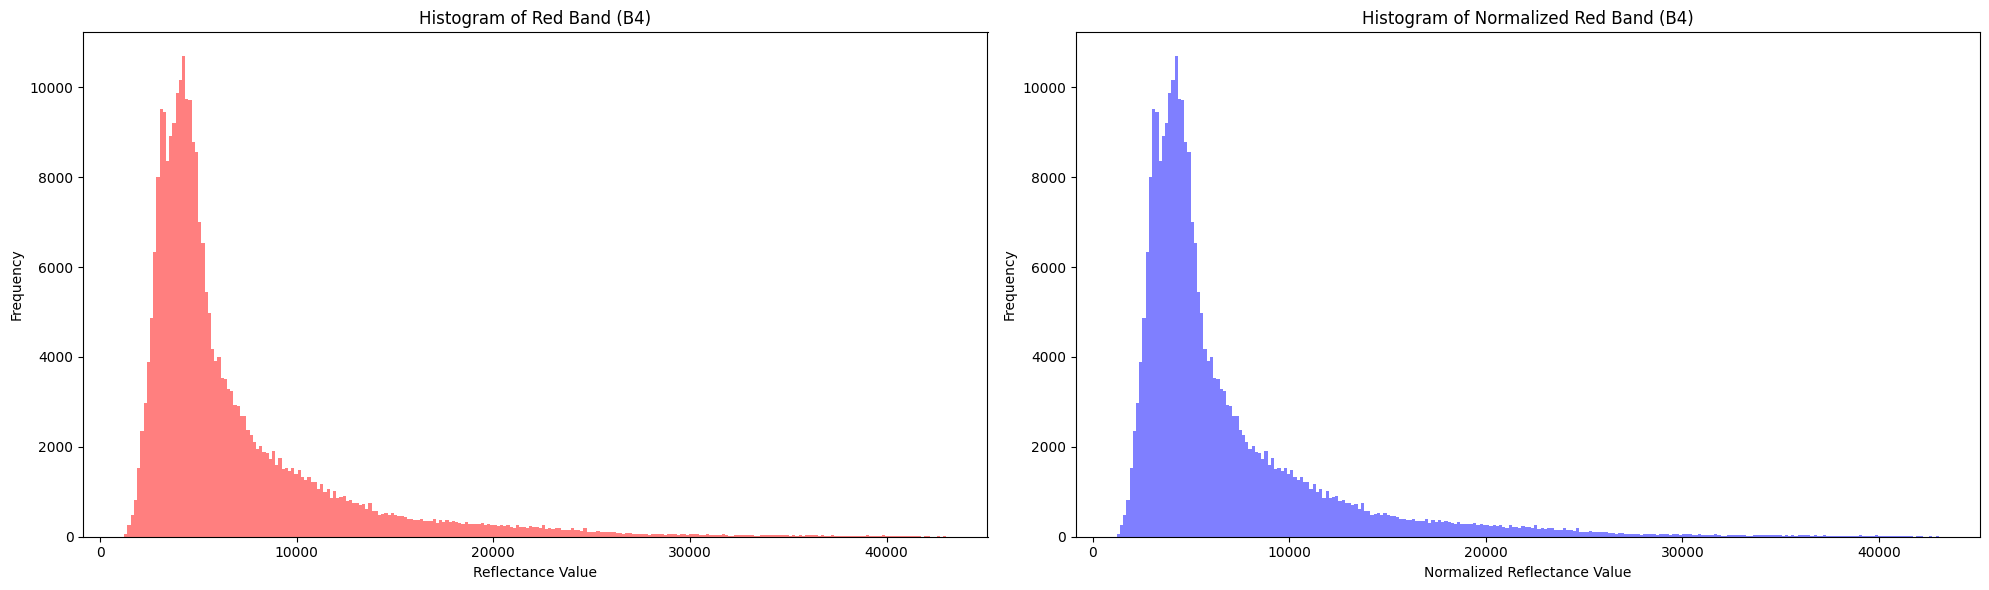

In [40]:
b4_normalized = B04 #/ 65535.0 * 10000
b8_normalized = B08 #/ 65535.0 * 10000

print(f'b4 in [{B04.min()},{B04.max()}]\nb4_normalized  in [{b4_normalized.min()},{b4_normalized.max()}]')
print(f'b8 in [{B08.min()},{B08.max()}] - b8_normalized in [{b8_normalized.min()},{b8_normalized.max()}]')

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# Plotting the histogram for the original Red Band (B4)
axs[0].hist(B04.ravel(), bins=256, color='red', alpha=0.5)
axs[0].set_title('Histogram of Red Band (B4)')
axs[0].set_xlabel('Reflectance Value')
axs[0].set_ylabel('Frequency')

# Plotting the histogram for the normalized Red Band (B4)
axs[1].hist(b4_normalized.ravel(), bins=256, color='blue', alpha=0.5)
axs[1].set_title('Histogram of Normalized Red Band (B4)')
axs[1].set_xlabel('Normalized Reflectance Value')
axs[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
